# pyqte


## Introduction

The following examples demonstrate how to use the `pyqte` package to estimate various Quantile Treatment Effects (QTE) using the interface provided by the package. These examples assume that you have installed the `pyqte` package and its dependencies as described in the [Installation Guide](installation.md).


### Data
* *lalonde_exp* - Lalonde’s Experimental Dataset
  * The cross sectional verion of the experimental part of the lalonde dataset. 
* *lalonde_exp_panel* - Lalonde’s Panel Experimental Dataset
  * The panel verion of the experimental part of the lalonde dataset. 
* *lalonde_psid* - Lalonde’s Observational Dataset
  * The cross sectional verion of the observational part of the lalonde dataset.
* *lalonde_psid_panel* - Lalonde’s Experimental Dataset
  * The panel verion of the observational part of the lalonde dataset.


### QTE - Quantile Treatment Effect (QTEEstimator)

This method implements estimates the Quantile Treatment Effect (QTE) under a Conditional Independence Assumption (sometimes this is called Selection on Observables) developed in Firpo (2007). This method using propensity score re-weighting and minimizes a check function to compute the QTET. Standard errors (if requested) are computed using the bootstrap.


* Firpo, Sergio. “Efficient Semiparametric Estimation of Quantile Treatment Effects.” Econometrica 75.1, pp. 259-276, 2015.



#### Without Covariates

  |                                                  | 0 % ~calculating   |+                                                 | 1 % ~06s           |+                                                 | 2 % ~13s           |++                                                | 3 % ~10s           |++                                                | 4 % ~08s           |+++                                               | 5 % ~07s           |+++                                               | 6 % ~07s           |++++                                              | 7 % ~06s           |++++                                              | 8 % ~06s           |+++++                                             | 9 % ~06s           |+++++                                             | 10% ~05s           |++++++                                            | 11% ~05s           |++++++                                            | 12% ~05s           |+++++++                                           | 13% ~05s 

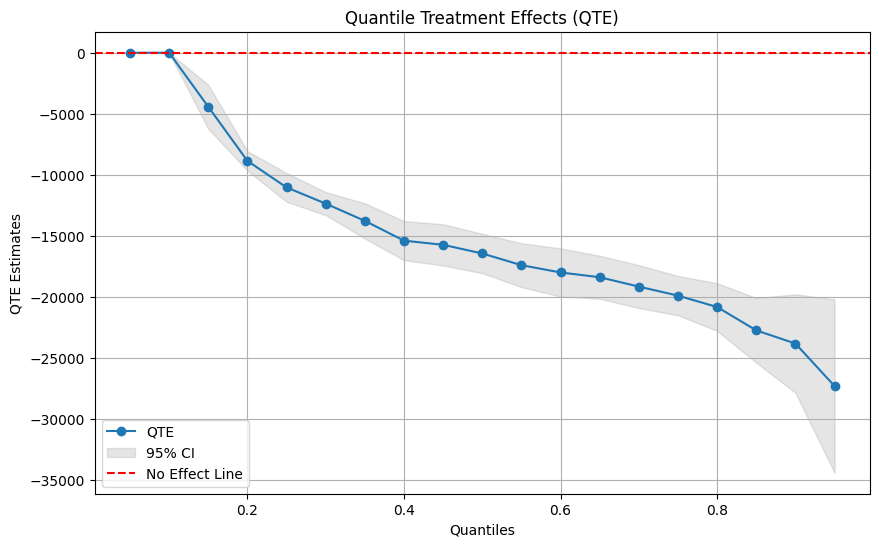

,Quantile,QTE,QTE Lower Bound,QTE Upper Bound
0,0.05,0.000016,-0.000014,0.000045
1,0.10,-0.000011,-0.000035,0.000013
2,0.15,-4433.179614,-6243.059207,-2623.300021
3,0.20,-8866.359276,-9668.491916,-8064.226636
4,0.25,-11041.036576,-12219.882530,-9862.190622
5,0.30,-12369.655109,-13313.783307,-11425.526912
6,0.35,-13783.866527,-15229.003366,-12338.729689
7,0.40,-15404.987508,-17007.839713,-13802.135304
8,0.45,-15747.885346,-17440.366968,-14055.403724
9,0.50,-16455.862053,-18068.049941,-14843.674164


In [1]:
from pyqte.qte import QTEEstimator
import pandas as pd

lalonde_psid = pd.read_csv("https://github.com/Daniel-Uhr/data/raw/main/lalonde_psid.csv")

qte_estimator_1 = QTEEstimator(
    formula='re78 ~ treat', 
    xformla=None,  
    data=lalonde_psid, 
    probs=[0.05, 0.95, 0.05],  
    se=True,                  
    iters=100                 
)

qte_estimator_1.fit()
qte_estimator_1.summary()
qte_estimator_1.plot()
qte_estimator_1.get_results()

#### With Covariates

  |                                                  | 0 % ~calculating   |+                                                 | 1 % ~11s           |+                                                 | 2 % ~09s           |++                                                | 3 % ~10s           |++                                                | 4 % ~09s           |+++                                               | 5 % ~09s           |+++                                               | 6 % ~09s           |++++                                              | 7 % ~09s           |++++                                              | 8 % ~09s           |+++++                                             | 9 % ~09s           |+++++                                             | 10% ~08s           |++++++                                            | 11% ~08s           |++++++                                            | 12% ~08s           |+++++++                                           | 13% ~08s 

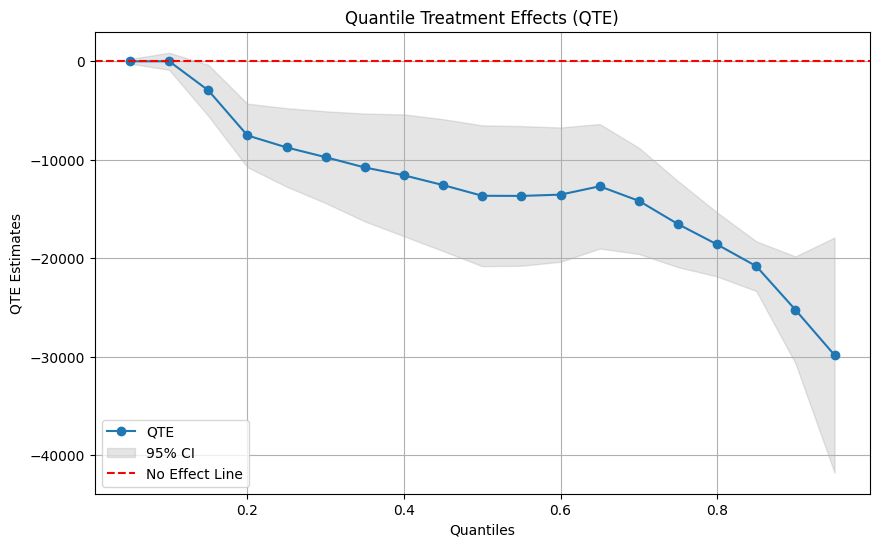

,Quantile,QTE,QTE Lower Bound,QTE Upper Bound
0,0.05,0.000006,-233.689676,233.689689
1,0.10,0.000027,-868.116779,868.116833
2,0.15,-2955.453052,-5551.300834,-359.605269
3,0.20,-7536.405174,-10763.181460,-4309.628888
4,0.25,-8754.130926,-12739.247468,-4769.014383
5,0.30,-9748.070979,-14414.919387,-5081.222571
6,0.35,-10792.620230,-16270.165934,-5315.074526
7,0.40,-11588.752156,-17776.366705,-5401.137607
8,0.45,-12583.218990,-19284.196814,-5882.241166
9,0.50,-13667.878476,-20823.102300,-6512.654652


In [2]:
from pyqte.qte import QTEEstimator
import pandas as pd

# Carregar os dados
lalonde_psid = pd.read_csv("https://github.com/Daniel-Uhr/data/raw/main/lalonde_psid.csv")

# Inicialize o estimador QTE com covariáveis adicionais
qte_estimator_2 = QTEEstimator(
    formula='re78 ~ treat', 
    xformla='~ age + I(age^2) + education + black + hispanic + married + nodegree',  # Covariáveis adicionais
    data=lalonde_psid, 
    probs=[0.05, 0.95, 0.05],  # Quantis de interesse
    se=True,                  # Não calcular erros padrão
    iters=100                  # Número de iterações do bootstrap
)

qte_estimator_2.fit()
qte_estimator_2.summary()
qte_estimator_2.plot()
qte_estimator_2.get_results()

### QTET - Quantile Treatment Effect on the Treated (QTETEstimator)

This method implements estimates the Quantile Treatment Effect on the Treated (QTET) under a Conditional Independence Assumption (sometimes this is called Selection on Observables) developed in Firpo (2007). This method using propensity score re-weighting and minimizes a check function to compute the QTET. Standard errors (if requested) are computed using the bootstrap.

* Firpo, Sergio. “Efficient Semiparametric Estimation of Quantile Treatment Effects.” Econometrica 75.1, pp. 259-276, 2015.

  |                                                  | 0 % ~calculating   |+++++                                             | 10% ~00s           |++++++++++                                        | 20% ~00s           |+++++++++++++++                                   | 30% ~00s           |++++++++++++++++++++                              | 40% ~00s           |+++++++++++++++++++++++++                         | 50% ~00s           |++++++++++++++++++++++++++++++                    | 60% ~00s           |+++++++++++++++++++++++++++++++++++               | 70% ~00s           |++++++++++++++++++++++++++++++++++++++++          | 80% ~00s           |+++++++++++++++++++++++++++++++++++++++++++++     | 90% ~00s           |++++++++++++++++++++++++++++++++++++++++++++++++++| 100% elapsed=00s  

Quantile Treatment Effect:
		
tau	QTE	Std. Error
0.05	     0.00	     0.00
0.1	     0.00	    63.72
0.15	 -4388.53	  1045.06
0.2	 -8783.29	   449.49
0.25	-11171.92	   518.45
0.3	-12434.94	   475.77
0.35	-137

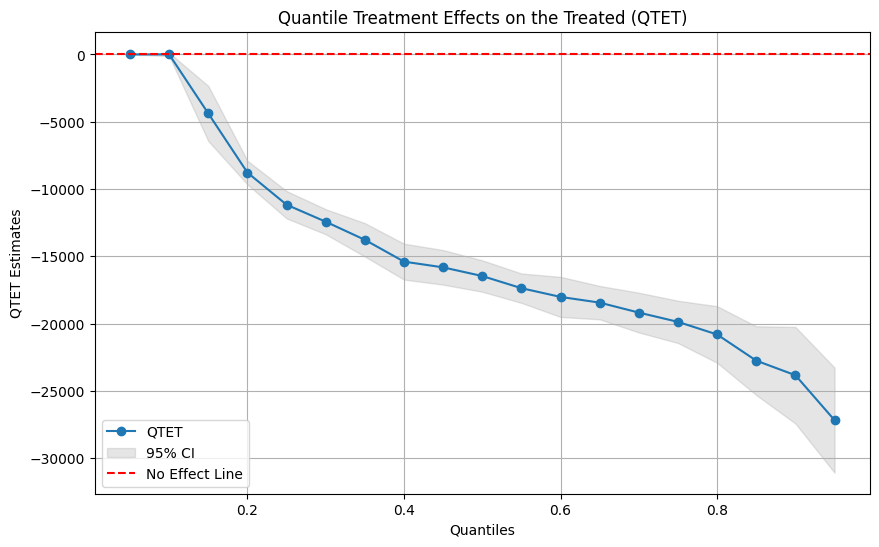

,Quantile,QTE,QTE Lower Bound,QTE Upper Bound
0,0.05,0.000000,0.000000,0.000000
1,0.10,0.000000,-124.887816,124.887816
2,0.15,-4388.531250,-6436.814691,-2340.247809
3,0.20,-8783.287426,-9664.278335,-7902.296517
4,0.25,-11171.916528,-12188.068427,-10155.764629
5,0.30,-12434.940164,-13367.436647,-11502.443681
6,0.35,-13780.900273,-15022.338360,-12539.462187
7,0.40,-15401.863369,-16735.944781,-14067.781957
8,0.45,-15827.888404,-17114.021022,-14541.755787
9,0.50,-16472.180469,-17638.991018,-15305.369920


In [1]:
from pyqte.qtet import QTETEstimator
import pandas as pd

# Carregar os dados
lalonde_psid = pd.read_csv("https://github.com/Daniel-Uhr/data/raw/main/lalonde_psid.csv")

# Inicializar o estimador QTET sem covariáveis
qtet_estimator_1 = QTETEstimator(
    formula='re78 ~ treat', 
    xformla=None,  # Sem covariáveis adicionais
    data=lalonde_psid, 
    probs=[0.05, 0.95, 0.05],   # Quantis de interesse
    se=True,                    # Não calcular erros padrão
    iters=10                    # Número de iterações do bootstrap
)

qtet_estimator_1.fit()
qtet_estimator_1.summary()
qtet_estimator_1.plot()
qtet_estimator_1.get_results()

  |                                                  | 0 % ~calculating   |+                                                 | 1 % ~05s           |+                                                 | 2 % ~04s           |++                                                | 3 % ~05s           |++                                                | 4 % ~05s           |+++                                               | 5 % ~04s           |+++                                               | 6 % ~04s           |++++                                              | 7 % ~04s           |++++                                              | 8 % ~04s           |+++++                                             | 9 % ~04s           |+++++                                             | 10% ~04s           |++++++                                            | 11% ~04s           |++++++                                            | 12% ~04s           |+++++++                                           | 13% ~04s 

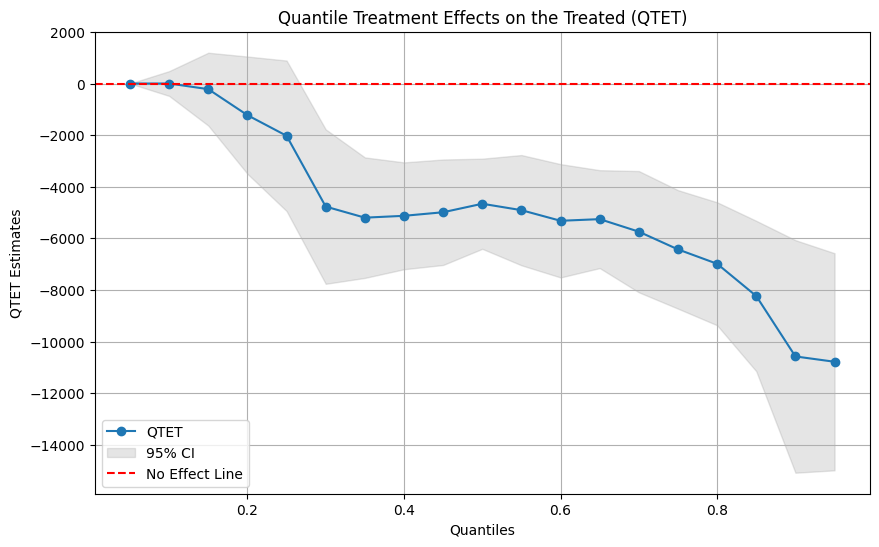

,Quantile,QTE,QTE Lower Bound,QTE Upper Bound
0,0.05,-0.000077,-0.000098,-0.000057
1,0.10,-0.000052,-480.182288,480.182184
2,0.15,-218.703540,-1630.572392,1193.165311
3,0.20,-1226.513024,-3498.483633,1045.457585
4,0.25,-2025.712561,-4941.699266,890.274144
5,0.30,-4768.961252,-7761.587095,-1776.335409
6,0.35,-5198.264421,-7533.385664,-2863.143179
7,0.40,-5126.631534,-7197.001963,-3056.261105
8,0.45,-4988.253595,-7032.225943,-2944.281246
9,0.50,-4659.234578,-6406.345495,-2912.123661


In [6]:
from pyqte.qtet import QTETEstimator
import pandas as pd

# Carregar os dados
lalonde_psid = pd.read_csv("https://github.com/Daniel-Uhr/data/raw/main/lalonde_psid.csv")

# Inicializar o estimador QTET com covariáveis
qtet_estimator_2 = QTETEstimator(
    formula='re78 ~ treat', 
    xformla='~ age + I(age**2) + education + black + hispanic + married + nodegree', 
    data=lalonde_psid, 
    probs=[0.05, 0.95, 0.05],  # Quantis de interesse
    se=True,                  # Não calcular erros padrão
    iters=100                  # Número de iterações do bootstrap
)

qtet_estimator_2.fit()
qtet_estimator_2.summary()
qtet_estimator_2.plot()
qtet_estimator_2.get_results()

### CIC - Changes-in-Changes (CiCEstimator)

CiCEstimator computes the Quantile Treatment Effect on the Treated (QTET) using the method of Athey and Imbens (2006). CiC is a Difference in Differences type method. It requires having two periods of data that can be either repeated cross sections or panel data. The method can accommodate conditioning on covariates though it does so in a restrictive way: It specifies a linear model for outcomes conditional on group-time dummies and covariates. Then, after residualizing (see details in Athey and Imbens (2006)), it computes the Change in Changes model based on these quasi-residuals.

* Athey, Susan andGuidoImbens. “Identification andInference in Nonlinear Difference-in-Differences Models.” Econometrica 74.2, pp. 431-497, 2006.

  |                                                  | 0 % ~calculating   |+++++                                             | 10% ~15s           |++++++++++                                        | 20% ~13s           |+++++++++++++++                                   | 30% ~11s           |++++++++++++++++++++                              | 40% ~10s           |+++++++++++++++++++++++++                         | 50% ~08s           |++++++++++++++++++++++++++++++                    | 60% ~06s           |+++++++++++++++++++++++++++++++++++               | 70% ~05s           |++++++++++++++++++++++++++++++++++++++++          | 80% ~03s           |+++++++++++++++++++++++++++++++++++++++++++++     | 90% ~02s           |++++++++++++++++++++++++++++++++++++++++++++++++++| 100% elapsed=16s  

Quantile Treatment Effect:
		
tau	QTE	Std. Error
0.05	   0.00	   0.00
0.1	   0.00	   0.00
0.15	   0.00	   0.00
0.2	   0.00	   0.00
0.25	 485.23	 357.80
0.3	 929.88	 297.11
0.35	1460.36	 407.81
0.4	2321.11	

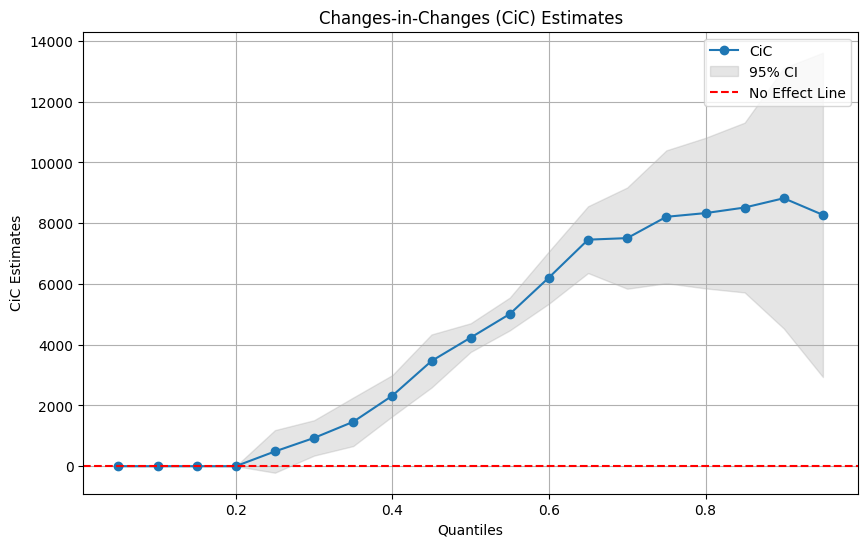

,Quantile,QTE,QTE Lower Bound,QTE Upper Bound
0,0.05,0.000000,0.000000,0.000000
1,0.10,0.000000,0.000000,0.000000
2,0.15,0.000000,0.000000,0.000000
3,0.20,0.000000,0.000000,0.000000
4,0.25,485.230000,-216.039710,1186.499710
5,0.30,929.884000,347.550675,1512.217325
6,0.35,1460.360000,661.073331,2259.646669
7,0.40,2321.110000,1643.050923,2999.169077
8,0.45,3462.560000,2588.485481,4336.634519
9,0.50,4232.310000,3759.752034,4704.867966


In [2]:
from pyqte.cic import CiCEstimator
import pandas as pd

# Carregar os dados
lalonde_psid_panel = pd.read_csv("https://github.com/Daniel-Uhr/data/raw/main/lalonde_psid_panel.csv")

# Inicialize o estimador CiC com as mesmas configurações do exemplo em R
cic_estimator = CiCEstimator(
    formula='re ~ treat',
    data=lalonde_psid_panel,
    t=1978,
    tmin1=1975,
    tname='year',
    idname='id',
    xformla='~ age + I(age**2) + education + black + hispanic + married + nodegree',
    se=True,  # Não calcular erros padrão
    probs=[0.05, 0.95, 0.05],  # Quantis de interesse
    iters=10                  # Número de iterações do bootstrap
)

cic_estimator.fit()
summary_cic = cic_estimator.summary()
cic_estimator.plot()
cic_estimator.get_results()

### DDiD2 (DDiD2Estimator)

DDiD2Estimator computes the Quantile Treatment Effect on the Treated (QTET) using the method of Callaway, Li, and Oka (2015).



#### Without Covariates

  |                                                  | 0 % ~calculating   |+                                                 | 1 % ~50s           |+                                                 | 2 % ~39s           |++                                                | 3 % ~35s           |++                                                | 4 % ~33s           |+++                                               | 5 % ~31s           |+++                                               | 6 % ~30s           |++++                                              | 7 % ~29s           |++++                                              | 8 % ~28s           |+++++                                             | 9 % ~28s           |+++++                                             | 10% ~27s           |++++++                                            | 11% ~26s           |++++++                                            | 12% ~25s           |+++++++                                           | 13% ~25s 

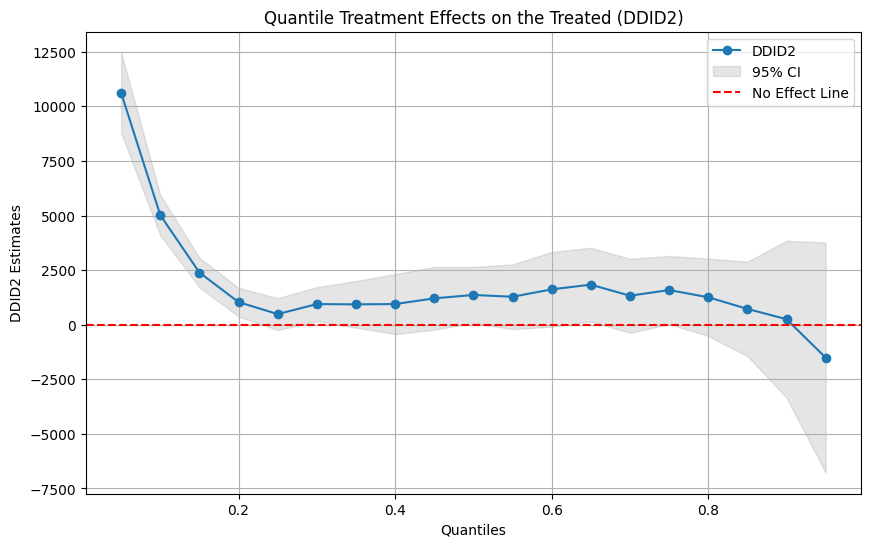

,Quantile,QTE,QTE Lower Bound,QTE Upper Bound
0,0.05,10616.612695,8775.790556,12457.434834
1,0.10,5019.825977,4092.501629,5947.150324
2,0.15,2388.119824,1714.710450,3061.529198
3,0.20,1033.226367,375.745855,1690.706879
4,0.25,485.230000,-243.998370,1214.458370
5,0.30,943.047200,163.823215,1722.271185
6,0.35,931.452555,-136.221221,1999.126331
7,0.40,945.353344,-429.308823,2320.015510
8,0.45,1205.884527,-231.908563,2643.677617
9,0.50,1362.109805,78.733072,2645.486538


In [1]:
from pyqte.ddid2 import DDID2Estimator
import pandas as pd

lalonde_psid_panel = pd.read_csv("https://github.com/Daniel-Uhr/data/raw/main/lalonde_psid_panel.csv")

# Inicializar o estimador DDID2 com as mesmas configurações do exemplo em R
ddid2_estimator_1 = DDID2Estimator(
    formula='re ~ treat',
    data=lalonde_psid_panel,
    t=1978,
    tmin1=1975,
    tname='year',
    idname='id',
    se=True,
    probs=[0.05, 0.95, 0.05],
    iters=100
)

ddid2_estimator_1.fit()
ddid2_estimator_1.summary()
ddid2_estimator_1.plot()
ddid2_estimator_1.get_results()


#### With Covariates

  |                                                  | 0 % ~calculating   |+++++                                             | 10% ~09s           |++++++++++                                        | 20% ~08s           |+++++++++++++++                                   | 30% ~07s           |++++++++++++++++++++                              | 40% ~06s           |+++++++++++++++++++++++++                         | 50% ~05s           |++++++++++++++++++++++++++++++                    | 60% ~04s           |+++++++++++++++++++++++++++++++++++               | 70% ~03s           |++++++++++++++++++++++++++++++++++++++++          | 80% ~02s           |+++++++++++++++++++++++++++++++++++++++++++++     | 90% ~01s           |++++++++++++++++++++++++++++++++++++++++++++++++++| 100% elapsed=11s  

Quantile Treatment Effect:
		
tau	QTE	Std. Error
0.05	 9832.19	  874.23
0.1	 4544.63	  483.77
0.15	 2068.77	  208.61
0.2	  849.12	  291.51
0.25	  485.23	  342.56
0.3	  943.05	  367.85
0.35	  817.00	  578.3

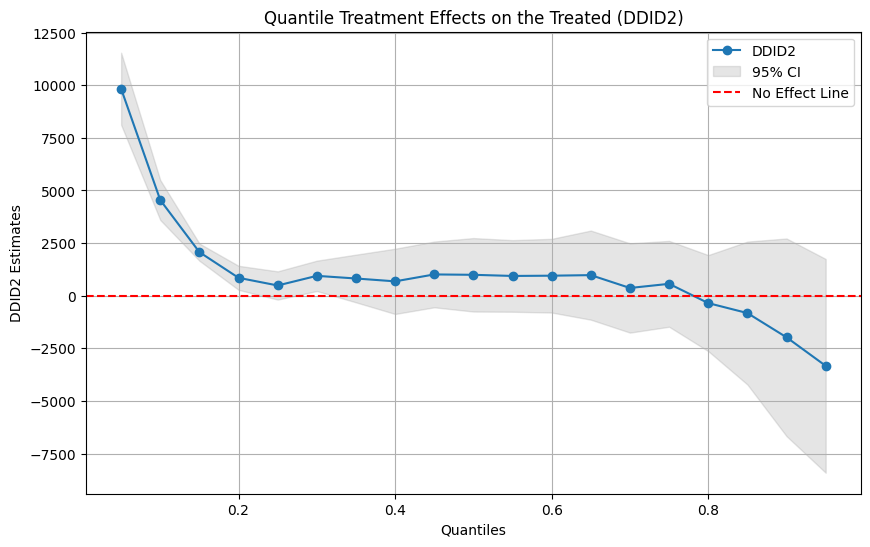

,Quantile,QTE,QTE Lower Bound,QTE Upper Bound
0,0.05,9832.189062,8118.736009,11545.642116
1,0.10,4544.634277,3596.468684,5492.799871
2,0.15,2068.765676,1659.893820,2477.637533
3,0.20,849.123047,277.765123,1420.480971
4,0.25,485.230000,-186.176392,1156.636392
5,0.30,943.047200,222.069836,1664.024564
6,0.35,817.003304,-316.471026,1950.477633
7,0.40,681.370566,-869.448590,2232.189722
8,0.45,1010.114925,-552.044554,2572.274404
9,0.50,992.301797,-753.284770,2737.888363


In [1]:
from pyqte.ddid2 import DDID2Estimator
import pandas as pd

# Carregar os dados
lalonde_psid_panel = pd.read_csv("https://github.com/Daniel-Uhr/data/raw/main/lalonde_psid_panel.csv")

# Inicializar o estimador DDID2 com fórmula e covariáveis
ddid2_estimator_2 = DDID2Estimator(
    formula='re ~ treat',
    xformla='~ age + I(age**2) + education + black + hispanic + married + nodegree',
    data=lalonde_psid_panel,
    t=1978,
    tmin1=1975,
    tname='year',
    idname='id',
    se=True,
    probs=[0.05, 0.95, 0.05],
    iters=10
)

ddid2_estimator_2.fit()
ddid2_estimator_2.summary()
ddid2_estimator_2.plot()
ddid2_estimator_2.get_results()

### MDID (MDiDEstimator)

MDiDEstimator is a Difference in Differences type method for computing the QTET. The method can accommodate conditioning on covariates though it does so in a restrictive way: It specifies a linear model for outcomes conditional on group-time dummies and covariates. Then, after residualizing (see details in Athey and Imbens (2006)), it computes the Change in Changes model based on these quasi-residuals.

* Athey, Susan andGuidoImbens. “Identification andInference in Nonlinear Difference-in-Differences Models.” Econometrica 74.2, pp. 431-497, 2006. 
* Thuysbaert, Bram. “Distributional Comparisons in Difference in Differences Models.” Working Paper, 2007.


Quantile Treatment Effect:
		
tau	QTE	Std. Error
0.05	 -57.93	1391.83
0.1	  92.45	1063.76
0.15	 570.02	1020.00
0.2	  35.09	 993.20
0.25	 286.78	 919.00
0.3	 443.70	 764.92
0.35	 258.39	 879.04
0.4	 914.24	 949.72
0.45	 985.05	 908.26
0.5	1365.56	1012.87
0.55	2053.59	1028.00
0.6	2890.01	 998.94
0.65	2826.56	 791.57
0.7	2943.04	 704.18
0.75	2269.17	 849.25
0.8	3198.58	1142.15
0.85	4440.13	1444.99
0.9	4427.63	1248.42
0.95	5820.01	1906.31

Average Treatment Effect:	2326.51
	 Std. Error: 		732.48



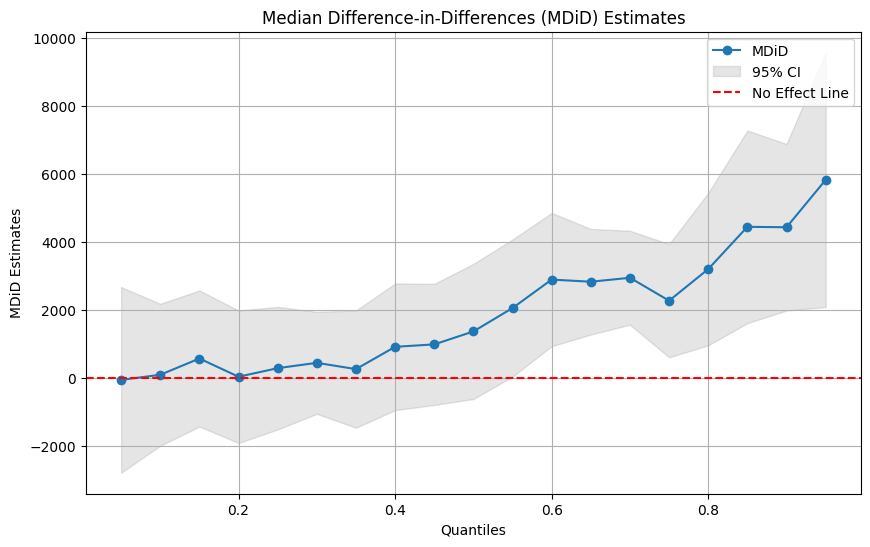

,Quantile,MDiD,MDiD Lower Bound,MDiD Upper Bound
0,0.05,-57.934308,-2785.871365,2670.002750
1,0.10,92.449967,-1992.479615,2177.379549
2,0.15,570.024307,-1429.136708,2569.185323
3,0.20,35.091288,-1911.553002,1981.735578
4,0.25,286.781331,-1514.417305,2087.979966
5,0.30,443.703593,-1055.519509,1942.926695
6,0.35,258.385864,-1464.494959,1981.266688
7,0.40,914.242225,-947.165776,2775.650226
8,0.45,985.051221,-795.111878,2765.214321
9,0.50,1365.558181,-619.635144,3350.751506


In [2]:
from pyqte.mdid import MDiDEstimator
import pandas as pd

# Carregar os dados
lalonde_psid_panel = pd.read_csv("https://github.com/Daniel-Uhr/data/raw/main/lalonde_psid_panel.csv")

# Inicializar o estimador MDiD com covariáveis
mdid_estimator = MDiDEstimator(
    formula='re ~ treat',
    xformla='~ age + I(age**2) + education + black + hispanic + married + nodegree',
    data=lalonde_psid_panel,
    t=1978,
    tmin1=1975,
    tname='year',
    idname='id',
    se=True,
    probs=[0.05, 0.95, 0.05]
)

mdid_estimator.fit()
mdid_estimator.summary()
mdid_estimator.plot()
mdid_estimator.get_results()

### Panel QTET - Panel Quantile Treatment Effect on the Treated (PanelQTETEstimator)

PanelQTETEstimator computes the Quantile Treatment Effect on the Treated (QTET) using the method of Callaway and Li (2015). This method should be used when the researcher wants to invoke a Difference in Differences assumption to identify the QTET. Relative to the other Difference in Differences methods available in the qte package, this method’s assumptions are more intuitively similar to the identifying assumptions used in identifying the Average Treatment Effect on the Treated (ATT). Additionally, this method can accommodate covariates in a more flexible way than the other Difference in Differences methods available. In order to accommodate covariates, the user should specify a vector x of covariate names. The user also may specify a method for estimating the propensity score. The default is logit. panel.qtet can only be used in some situations, however. The method requires three periods of panel data where individuals are not treated until the last period. The data should be formatted as a panel; the names of columns containing time periods and ids for each cross sectional unit need to be passed to the method.

* Callaway, Brantly and Tong Li. “Quantile Treatment Effects in Difference in Differences Models with Panel Data.” https://onlinelibrary.wiley.com/doi/full/10.3982/QE935.

  |                                                  | 0 % ~calculating   |+                                                 | 1 % ~17s           |+                                                 | 2 % ~14s           |++                                                | 3 % ~15s           |++                                                | 4 % ~14s           |+++                                               | 5 % ~14s           |+++                                               | 6 % ~13s           |++++                                              | 7 % ~13s           |++++                                              | 8 % ~13s           |+++++                                             | 9 % ~13s           |+++++                                             | 10% ~13s           |++++++                                            | 11% ~12s           |++++++                                            | 12% ~12s           |+++++++                                           | 13% ~12s 

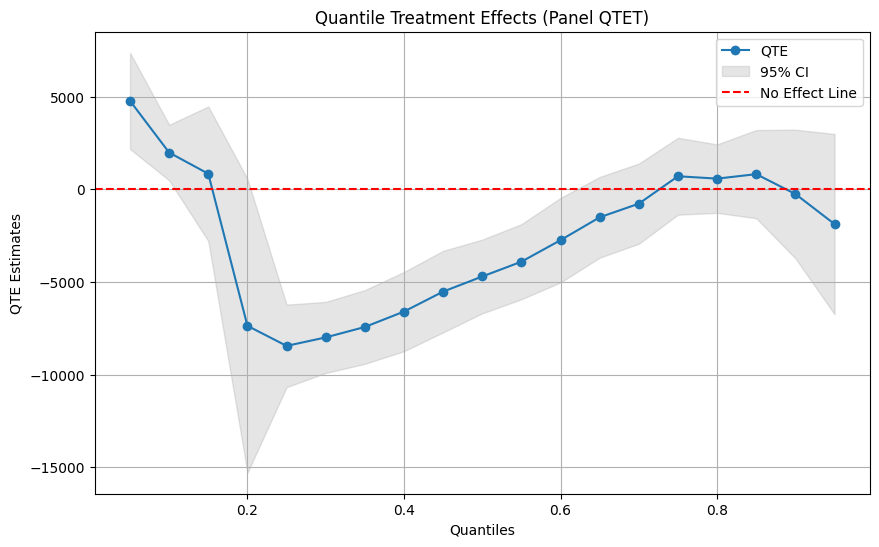

,Quantile,QTE,QTE Lower Bound,QTE Upper Bound
0,0.05,4779.208309,2181.440650,7376.975968
1,0.10,1987.352753,487.190386,3487.515121
2,0.15,842.947664,-2788.819338,4474.714666
3,0.20,-7366.043682,-15296.976607,564.889243
4,0.25,-8449.964114,-10678.597609,-6221.330620
5,0.30,-7992.146914,-9910.043159,-6074.250670
6,0.35,-7429.210114,-9420.468966,-5437.951263
7,0.40,-6597.368114,-8736.534311,-4458.201917
8,0.45,-5519.446114,-7719.372390,-3319.519838
9,0.50,-4702.884114,-6693.197469,-2712.570760


In [4]:
# Run the PanelQTETEstimator on the experimental data with no covariates
from pyqte.panel_qtet import PanelQTETEstimator
import pandas as pd

lalonde_psid_panel = pd.read_csv("https://github.com/Daniel-Uhr/data/raw/main/lalonde_psid_panel.csv")

pq1 = PanelQTETEstimator(
    formula='re ~ treat',
    data=lalonde_psid_panel,
    t=1978,
    tmin1=1975,
    tmin2=1974,
    tname='year',
    idname='id',
    se=True,
    probs=[0.05, 0.95, 0.05]
)

pq1.fit()
pq1.summary()
pq1.plot()
pq1.get_results()

  |                                                  | 0 % ~calculating   |+                                                 | 1 % ~22s           |+                                                 | 2 % ~18s           |++                                                | 3 % ~16s           |++                                                | 4 % ~19s           |+++                                               | 5 % ~17s           |+++                                               | 6 % ~17s           |++++                                              | 7 % ~16s           |++++                                              | 8 % ~15s           |+++++                                             | 9 % ~15s           |+++++                                             | 10% ~14s           |++++++                                            | 11% ~14s           |++++++                                            | 12% ~14s           |+++++++                                           | 13% ~13s 

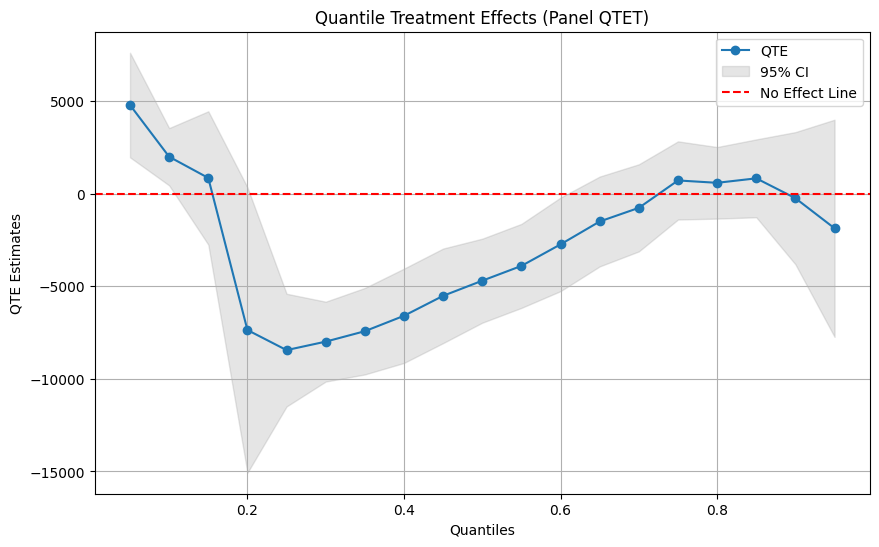

,Quantile,QTE,QTE Lower Bound,QTE Upper Bound
0,0.05,4779.208309,1956.478950,7601.937668
1,0.10,1987.352753,440.486643,3534.218864
2,0.15,842.947664,-2755.300006,4441.195334
3,0.20,-7366.043682,-15068.000879,335.913515
4,0.25,-8449.964114,-11492.366283,-5407.561946
5,0.30,-7992.146914,-10147.908005,-5836.385824
6,0.35,-7429.210114,-9763.689110,-5094.731119
7,0.40,-6597.368114,-9142.676916,-4052.059313
8,0.45,-5519.446114,-8071.315423,-2967.576805
9,0.50,-4702.884114,-6970.640610,-2435.127619


In [5]:
#Run the panel.qtet method on the observational data with no covariates
from pyqte.panel_qtet import PanelQTETEstimator
import pandas as pd

lalonde_psid_panel = pd.read_csv("https://github.com/Daniel-Uhr/data/raw/main/lalonde_psid_panel.csv")

pq2 = PanelQTETEstimator(
    formula='re ~ treat',
    data=lalonde_psid_panel,
    t=1978,
    tmin1=1975,
    tmin2=1974,
    tname='year',
    idname='id',
    se=True,  # Não calcular erros padrão
    probs=[0.05, 0.95, 0.05]  # Quantis de interesse
)

pq2.fit()
pq2.summary()
pq2.plot()
pq2.get_results()

  |                                                  | 0 % ~calculating   |+++++                                             | 10% ~04s           |++++++++++                                        | 20% ~04s           |+++++++++++++++                                   | 30% ~03s           |++++++++++++++++++++                              | 40% ~03s           |+++++++++++++++++++++++++                         | 50% ~02s           |++++++++++++++++++++++++++++++                    | 60% ~02s           |+++++++++++++++++++++++++++++++++++               | 70% ~01s           |++++++++++++++++++++++++++++++++++++++++          | 80% ~01s           |+++++++++++++++++++++++++++++++++++++++++++++     | 90% ~00s           |++++++++++++++++++++++++++++++++++++++++++++++++++| 100% elapsed=05s  

Quantile Treatment Effect:
		
tau	QTE	Std. Error
0.05	 2953.75	 1381.62
0.1	 1762.13	 1091.18
0.15	  630.91	 1433.44
0.2	-7254.06	 3019.26
0.25	-6768.83	 1998.30
0.3	-6311.01	 1461.61
0.35	-5748.07	 1467.7

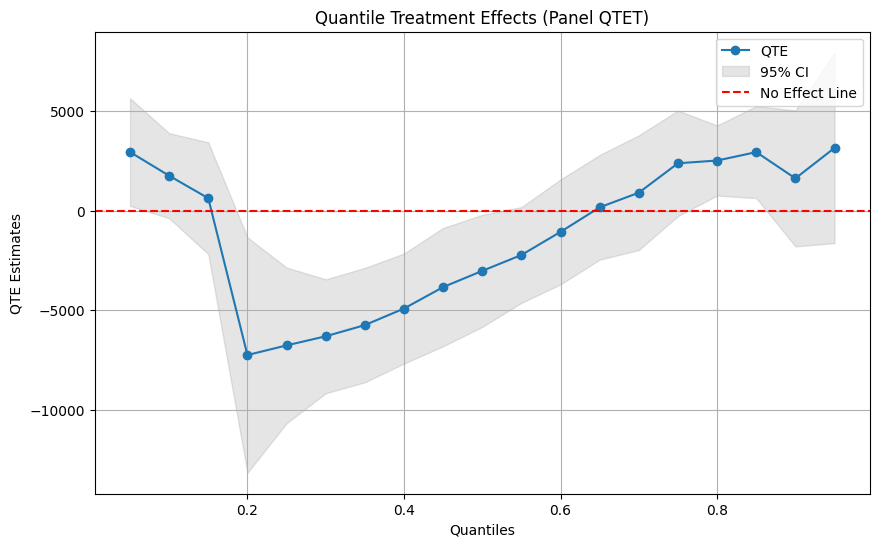

,Quantile,QTE,QTE Lower Bound,QTE Upper Bound
0,0.05,2953.749581,245.832589,5661.666572
1,0.10,1762.134323,-376.531167,3900.799813
2,0.15,630.906704,-2178.584973,3440.398381
3,0.20,-7254.058293,-13171.695955,-1336.420631
4,0.25,-6768.828293,-10685.432940,-2852.223646
5,0.30,-6311.011093,-9175.707689,-3446.314497
6,0.35,-5748.074293,-8624.709765,-2871.438821
7,0.40,-4916.232293,-7682.028538,-2150.436048
8,0.45,-3838.310293,-6815.346053,-861.274533
9,0.50,-3021.748293,-5839.830112,-203.666474


In [6]:
# Run the panel.qtet method on the observational data conditioning on age, education, black, hispanic, married, and nodegree. The propensity score will be estimated using the default logit method. 
from pyqte.panel_qtet import PanelQTETEstimator
import pandas as pd

lalonde_psid_panel = pd.read_csv("https://github.com/Daniel-Uhr/data/raw/main/lalonde_psid_panel.csv")

pq3 = PanelQTETEstimator(
    formula='re ~ treat',
    xformla='~ age + I(age**2) + education + black + hispanic + married + nodegree',  # Covariáveis
    data=lalonde_psid_panel,
    t=1978,
    tmin1=1975,
    tmin2=1974,
    tname='year',
    idname='id',
    se=True,                           
    iters=10,
    method="pscore",                    # propensity score (logit)
    probs=[0.05, 0.95, 0.05]            
)

pq3.fit()
pq3.summary()
pq3.plot()
pq3.get_results()

  |                                                  | 0 % ~calculating   |+++++                                             | 10% ~06s           |++++++++++                                        | 20% ~05s           |+++++++++++++++                                   | 30% ~04s           |++++++++++++++++++++                              | 40% ~03s           |+++++++++++++++++++++++++                         | 50% ~03s           |++++++++++++++++++++++++++++++                    | 60% ~02s           |+++++++++++++++++++++++++++++++++++               | 70% ~02s           |++++++++++++++++++++++++++++++++++++++++          | 80% ~01s           |+++++++++++++++++++++++++++++++++++++++++++++     | 90% ~01s           |++++++++++++++++++++++++++++++++++++++++++++++++++| 100% elapsed=05s  

Quantile Treatment Effect:
		
tau	QTE	Std. Error
0.05	    0.00	    0.00
0.1	    0.00	  407.54
0.15	 -218.70	 1144.12
0.2	-2159.20	 1004.41
0.25	-2538.65	  928.11
0.3	-3378.66	  986.91
0.35	-3370.51	 1032.6

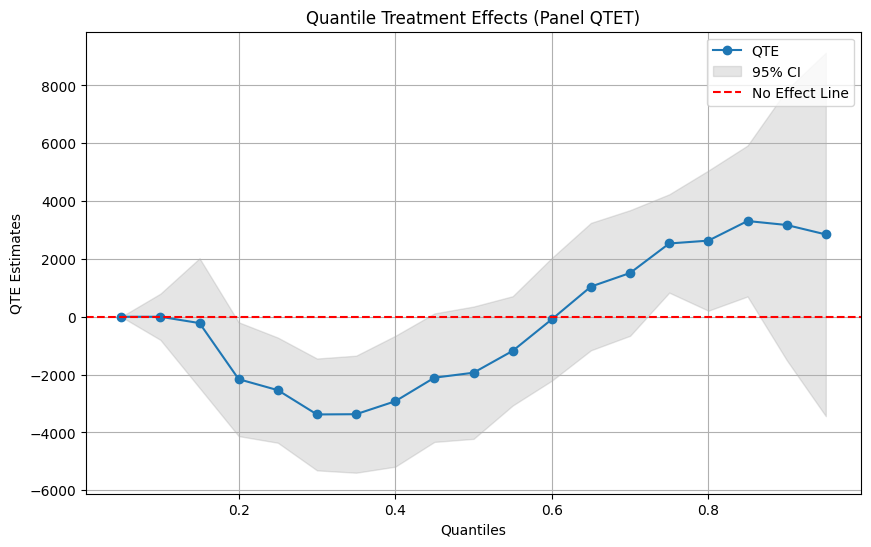

,Quantile,QTE,QTE Lower Bound,QTE Upper Bound
0,0.05,0.000000,0.000000,0.000000
1,0.10,0.000000,-798.759387,798.759387
2,0.15,-218.703537,-2461.130288,2023.723214
3,0.20,-2159.197164,-4127.811352,-190.582976
4,0.25,-2538.650000,-4357.715130,-719.584870
5,0.30,-3378.662800,-5312.974496,-1444.351104
6,0.35,-3370.513559,-5394.518335,-1346.508782
7,0.40,-2922.880738,-5185.519704,-660.241773
8,0.45,-2107.042000,-4328.911028,114.827028
9,0.50,-1935.370000,-4223.945918,353.205918


In [7]:
# Covariates and Quantile Regression (qr)
from pyqte.panel_qtet import PanelQTETEstimator
import pandas as pd

lalonde_psid_panel = pd.read_csv("https://github.com/Daniel-Uhr/data/raw/main/lalonde_psid_panel.csv")

pq4 = PanelQTETEstimator(
    formula='re ~ treat',
    xformla='~ age + I(age**2) + education + black + hispanic + married + nodegree',  # Covariáveis
    data=lalonde_psid_panel,
    t=1978,
    tmin1=1975,
    tmin2=1974,
    tname='year',
    idname='id',
    se=True,  
    iters=10,
    method="qr",                        # Quantile Regression (qr)
    probs=[0.05, 0.95, 0.05]  
)

pq4.fit()
pq4.summary()
pq4.plot()
pq4.get_results()

### Quantile Difference-in-Differences (QDiD - QDiDEstimator)

QDiDEstimator is a Difference in Differences type method for computing the QTET. The method can accommodate conditioning on covariates though it does so in a restrictive way: It specifies a linear model for outcomes conditional on group-time dummies and covariates. Then, after residualizing (see details in Athey and Imbens (2006)), it computes the Change in Changes model based on these quasi-residuals.

* Athey, Susan andGuidoImbens. “Identification andInference in Nonlinear Difference-in-Differences Models.” Econometrica 74.2, pp. 431-497, 2006.

  |                                                  | 0 % ~calculating   |+++++                                             | 10% ~07s           |++++++++++                                        | 20% ~07s           |+++++++++++++++                                   | 30% ~06s           |++++++++++++++++++++                              | 40% ~05s           |+++++++++++++++++++++++++                         | 50% ~04s           |++++++++++++++++++++++++++++++                    | 60% ~03s           |+++++++++++++++++++++++++++++++++++               | 70% ~02s           |++++++++++++++++++++++++++++++++++++++++          | 80% ~02s           |+++++++++++++++++++++++++++++++++++++++++++++     | 90% ~01s           |++++++++++++++++++++++++++++++++++++++++++++++++++| 100% elapsed=08s  

Quantile Treatment Effect:
		
tau	QTE	Std. Error
0.05	  306.34	  942.82
0.1	 -606.23	  853.56
0.15	 -856.17	  729.93
0.2	-1430.94	  743.18
0.25	-1200.28	  774.33
0.3	 -902.21	  709.76
0.35	 -500.36	  896.4

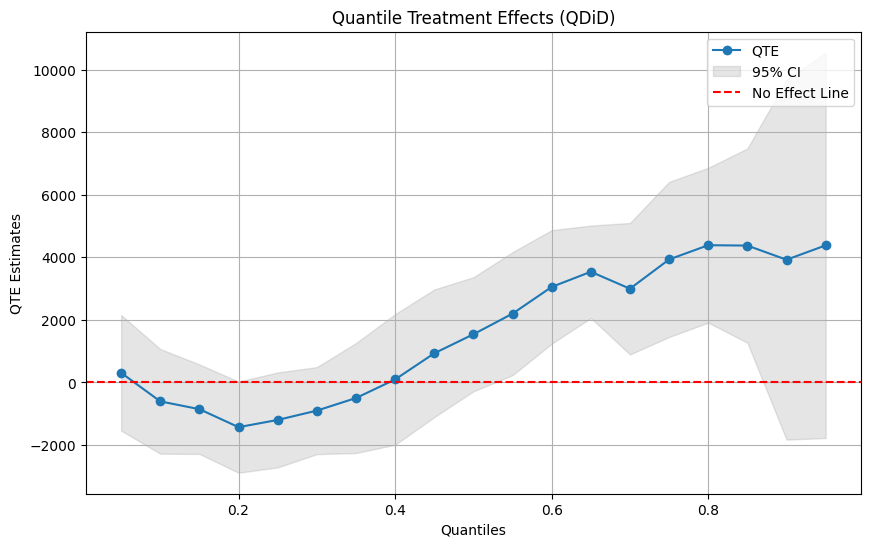

,Quantile,QTE,QTE Lower Bound,QTE Upper Bound
0,0.05,306.339240,-1541.559275,2154.237754
1,0.10,-606.234021,-2279.183414,1066.715371
2,0.15,-856.170786,-2286.807082,574.465510
3,0.20,-1430.938504,-2887.553885,25.676878
4,0.25,-1200.275293,-2717.926687,317.376102
5,0.30,-902.212286,-2293.309740,488.885169
6,0.35,-500.362217,-2257.317626,1256.593192
7,0.40,94.128294,-1992.840256,2181.096843
8,0.45,930.035767,-1110.467318,2970.538852
9,0.50,1538.915913,-285.331315,3363.163142


In [8]:
## Run the Quantile Difference in Differences method conditioning on age, education, black, hispanic, married, and nodegree.
from pyqte.qdid import QDiDEstimator
import pandas as pd

lalonde_psid_panel = pd.read_csv("https://github.com/Daniel-Uhr/data/raw/main/lalonde_psid_panel.csv")

qdid_estimator = QDiDEstimator(
    formula='re ~ treat',
    xformla='~ age + I(age**2) + education + black + hispanic + married + nodegree',
    data=lalonde_psid_panel,
    t=1978,
    tmin1=1975,
    tname='year',
    idname='id',
    se=True,  # Não calcular erros padrão
    probs=[0.05, 0.95, 0.05],  # Quantis de interesse
    iters=10
)

qdid_estimator.fit()
qdid_estimator.summary()
qdid_estimator.plot()
qdid_estimator.get_results()

##### SpATT

* Abadie, Alberto. 2005. “Semiparametric Difference-in-Differences Estimators.” The Review of Economic Studies 72 (1): 1–19.

In [9]:
from pyqte.spatt import SpATTEstimator
import pandas as pd

lalonde_psid_panel = pd.read_csv("https://github.com/Daniel-Uhr/data/raw/main/lalonde_psid_panel.csv")

# Inicializar o estimador SpATT sem covariáveis
spatt_estimator = SpATTEstimator(
    formula='re ~ treat',    # Fórmula especificando o resultado e o tratamento
    data=lalonde_psid_panel, # Conjunto de dados
    t=1978,                  # Período após o tratamento
    tmin1=1975,              # Período antes do tratamento
    tname='year',            # Nome da coluna que contém os períodos de tempo
    xformla=None,            # Nenhuma covariável adicional (x=NULL em R)
    idname='id',             # Nome da coluna que contém os identificadores únicos
    se=False                 # Não calcular erros padrão
)

spatt_estimator.fit()
spatt_estimator.summary()

Average Treatment Effect: 2326.51
